# Case 1 - Wine quality

Source: [UCI Wine](http://archive.ics.uci.edu/ml/datasets/Wine)

## Question

Can you predict to what cultivar a type of wine belongs?

## The problem

Based on the analysis of three types of wine from three different cultivars in a region of Italy, we need to be able to differentiate these types of wine.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('ml-week12/wine.data', sep=',', header=None)
df.columns = [
    'Label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
df.head()

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Description

In [4]:
# Show some descriptive information about the dataset.
df.describe()

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Features and labels

The label is a number between 1 and 3 and represents three different cultivars.



In [5]:
df.dtypes

Label                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Now we want to make a normalized box plot per feature, with the label on the x-axis. This will visualize how the labels can be differentiated from each other.

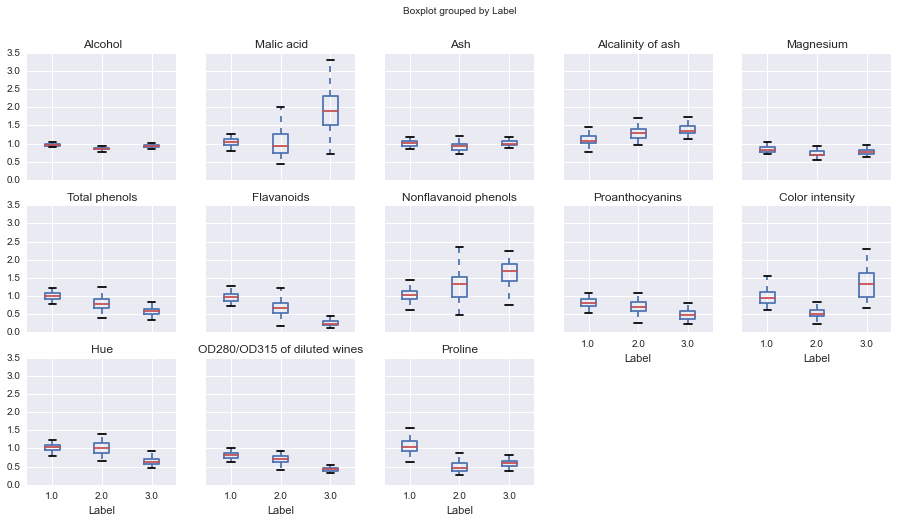

In [6]:
# Make a boxplot with standardized values
features = tuple(df.columns[1:].values)
df.div(df.loc[0]).boxplot(column=features, by='Label', figsize=(15,8), layout=(3,5));

In [7]:
# Check how many unique values the label has.
df['Label'].unique()

array([1, 2, 3])

Okay, all data is already neatly converted to floats and ints, so we don't have to do clean anything else.

See how the features and label relate to each other.

/Users/kees/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


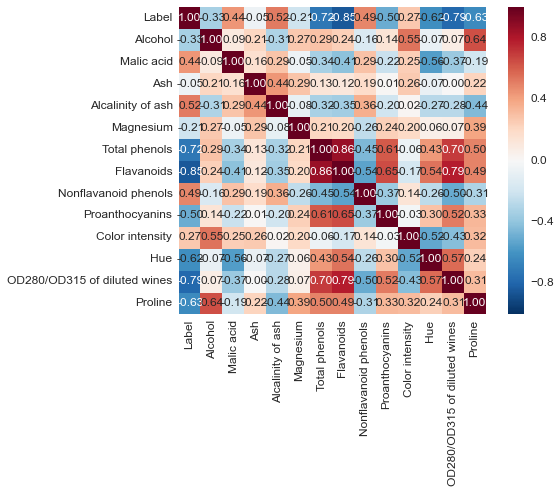

In [8]:
cols = df.columns.values
cm = np.corrcoef(df[cols].values, rowvar=0)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 12},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

## K-Means

In [9]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

In [10]:
# Separate the features from the label.
df_X = df[df.columns.tolist()[1::]]
df_y = df['Label']

Now plot two features to visualize that K-Means can correctly separate them.

/Users/kees/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


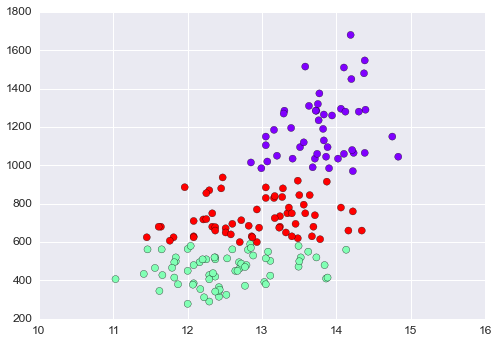

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

df_X_values = df_X.values
# random_state is fixed so the output will always stay the same.
est = KMeans(n_clusters=3,random_state=50)
y_kmeans = est.fit_predict(df_X_values)

plt.scatter(df_X_values[:, 0], df_X_values[:, 12], c=y_kmeans, s=50, cmap='rainbow');

In [34]:
# Permute labels from the clusters so that they are the same as the real labels.
from scipy.stats import mode

y = df_y.as_matrix()
labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

/Users/kees/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


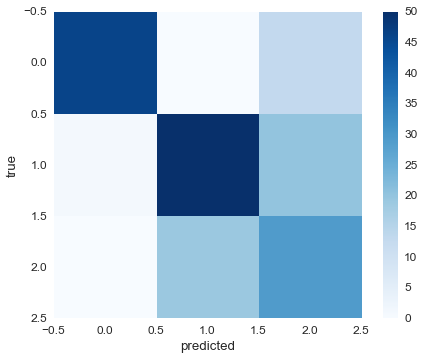

In [28]:
# The labels of K-Means are zero-based.
# Our labels start with a one, so in order to sync them we simply up each label with one.
#labels = [x+1 for x in est.labels_]
plt.imshow(confusion_matrix(df_y, labels), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

Looking at the chart, K-Means predicts the labels reasonably well. Only the last label seems to have less accuracy.

In [13]:
def predictKMeans(X):
    y = est.predict(X)
    # KMeans clusters are zero-based, our label is one-based (is that a thing?)
    # Up it with one to get the real label.
    real_label = y[0] + 1
    print('This wine should belong to label ' + str(real_label))

Try to predict to what label a wine belongs, given all features:

In [14]:
predictKMeans([14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065])

This wine should belong to label 1


## Classifiers

In [15]:
# Build a decision tree
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=22)

# Show the 'array' size of the numerical data
X_train.shape, y_train.shape

((133, 13), (133,))

Play with some classifiers to see which is the most accurate.

In [16]:
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier(max_depth=3)
clf_dt = clf_dt.fit(X_train, y_train)

# And call this method for the training data (display only accuracy)
measure_performance(X_test, y_test, clf_dt, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.867 



In [17]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

clf_rf = clf_rf.fit(X_train, y_train)

measure_performance(X_test, y_test, clf_rf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.956 



In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
measure_performance(X_test, y_test, gnb, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.956 



In [19]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb = gnb.fit(X_train, y_train)
measure_performance(X_test, y_test, bnb, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.956 



In [20]:
from sklearn.svm import SVC

# Try SVC with some different kernels (these make a huge difference apparently).
svc = SVC()
svc = svc.fit(X_train, y_train)
measure_performance(X_test, y_test, svc, show_classification_report=False, show_confusion_matrix=False)

svc = SVC(kernel='linear')
svc = svc.fit(X_train, y_train)
measure_performance(X_test, y_test, svc, show_classification_report=False, show_confusion_matrix=False)

svc = SVC(kernel='poly')
svc = svc.fit(X_train, y_train)
measure_performance(X_test, y_test, svc, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.378 

Accuracy:0.933 

Accuracy:0.911 



`RandomForestClassifier` is very accurate! Let's see if we can get it even more accurate by playing with the parameters.

In [21]:
# random_state is fixed so the output will always stay the same.
clf_rf2 = RandomForestClassifier(n_estimators=60, max_features=1, random_state=20)
clf_rf2 = clf_rf2.fit(X_train, y_train)

measure_performance(X_test, y_test, clf_rf2, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.978 



It seems that playing with `max_features` has the most influence. When setting this on `1`, the accuracy is sometimes even 1.0! Setting `n_estimators` to a value above `60` also seems to improve the accuracy somewhat.

## Predicting

Train the classifier with the whole dataset.

In [22]:
clf_real = RandomForestClassifier(n_estimators=60, max_features=1, random_state=20)
clf_real = clf_real.fit(df_X, df_y)

In [23]:
def predict(X):
    y = clf_real.predict(X)
    print('This wine should belong to label ' + str(y[0]) + '.')

Now let's predict something. Below I have inserted a part of the first row of the dataset. It has some features set to `0`.

In [24]:
predict([14.23,0,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,0,3.92,0])

This wine should belong to label 1.


And another heavily handicapped row, that should belong to label 3.

In [25]:
predict([13.40,0,0,0,0,1.80,0,0,1.41,7.3,0,0,0])

This wine should belong to label 3.
